<a href="https://www.kaggle.com/code/growbigger/multi-label-classification?scriptVersionId=98860541" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import json
import h5py
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

# Preprocess

In [2]:
fname_article ='../input/h-and-m-personalized-fashion-recommendations/articles.csv'
articles = pd.read_csv(fname_article, sep=',')

In [3]:
len(articles)

105542

In [4]:
articles[['product_type_name']].value_counts()

product_type_name
Trousers             11169
Dress                10362
Sweater               9302
T-shirt               7904
Top                   4155
                     ...  
Bra extender             1
Blanket                  1
Towel                    1
Wood balls               1
Cushion                  1
Length: 131, dtype: int64

In [5]:
train_df = articles[['article_id','index_name','product_type_name','section_name','detail_desc']]

In [6]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
train_df[['detail_desc']].head(5)

,detail_desc
0,Jersey top with narrow shoulder straps.
1,Jersey top with narrow shoulder straps.
2,Jersey top with narrow shoulder straps.
3,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."


In [7]:
article_unique_1 = train_df['index_name'].unique()
article_to_idx_1 = {v:k for k,v in enumerate(article_unique_1)}

temp_1 = train_df['index_name'].map(article_to_idx_1.get).dropna()
if len(temp_1) == len(train_df):
    print('no-null')
    train_df['index_name'] = temp_1
else:
    print('detect null')

article_unique_2 = train_df['product_type_name'].unique()
article_to_idx_2 = {v:k for k,v in enumerate(article_unique_2)}

temp_2 = train_df['product_type_name'].map(article_to_idx_2.get).dropna()
if len(temp_2) == len(train_df):
    print('no-null')
    train_df['product_type_name'] = temp_2
else:
    print('detect null')

article_unique_3 = train_df['section_name'].unique()
article_to_idx_3 = {v:k for k,v in enumerate(article_unique_3)}

temp_3 = train_df['section_name'].map(article_to_idx_3.get).dropna()
if len(temp_3) == len(train_df):
    print('no-null')
    train_df['section_name'] = temp_3
else:
    print('detect null')
train_df

no-null
no-null
no-null


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,article_id,index_name,product_type_name,section_name,detail_desc
0,108775015,0,0,0,Jersey top with narrow shoulder straps.
1,108775044,0,0,0,Jersey top with narrow shoulder straps.
2,108775051,0,0,0,Jersey top with narrow shoulder straps.
3,110065001,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,110065002,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
...,...,...,...,...,...
105537,953450001,3,3,4,Socks in a fine-knit cotton blend with a small motif at the top and elasticated tops.
105538,953763001,0,0,24,Loose-fitting sports vest top in ribbed fast-drying functional fabric made from recycled polyester with a racer back and rounded hem.
105539,956217002,0,25,28,"Short, A-line dress in jersey with a round neckline and V-shaped opening at the front with narrow ties. Long, voluminous raglan sleeves and wide cuffs with covered buttons."
105540,957375001,7,8,13,Large plastic hair claw.


In [8]:
train_df

,article_id,index_name,product_type_name,section_name,detail_desc
0,108775015,0,0,0,Jersey top with narrow shoulder straps.
1,108775044,0,0,0,Jersey top with narrow shoulder straps.
2,108775051,0,0,0,Jersey top with narrow shoulder straps.
3,110065001,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,110065002,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
...,...,...,...,...,...
105537,953450001,3,3,4,Socks in a fine-knit cotton blend with a small motif at the top and elasticated tops.
105538,953763001,0,0,24,Loose-fitting sports vest top in ribbed fast-drying functional fabric made from recycled polyester with a racer back and rounded hem.
105539,956217002,0,25,28,"Short, A-line dress in jersey with a round neckline and V-shaped opening at the front with narrow ties. Long, voluminous raglan sleeves and wide cuffs with covered buttons."
105540,957375001,7,8,13,Large plastic hair claw.


In [9]:
def checkExist(filePath):
    img_url = f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(filePath)[:2]}/0{int(filePath)}.jpg'
    if os.path.isfile(img_url):
        return True
    else:
        return False

In [10]:
train_df['imgExist'] = train_df['article_id'].apply(lambda x:checkExist(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
train_df = train_df[train_df['imgExist']==True]
train_df.to_csv(os.path.join('./', 'filteredArticle.csv'), index=False)
train_df

,article_id,index_name,product_type_name,section_name,detail_desc,imgExist
0,108775015,0,0,0,Jersey top with narrow shoulder straps.,True
1,108775044,0,0,0,Jersey top with narrow shoulder straps.,True
2,108775051,0,0,0,Jersey top with narrow shoulder straps.,True
3,110065001,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.",True
4,110065002,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.",True
...,...,...,...,...,...,...
105537,953450001,3,3,4,Socks in a fine-knit cotton blend with a small motif at the top and elasticated tops.,True
105538,953763001,0,0,24,Loose-fitting sports vest top in ribbed fast-drying functional fabric made from recycled polyester with a racer back and rounded hem.,True
105539,956217002,0,25,28,"Short, A-line dress in jersey with a round neckline and V-shaped opening at the front with narrow ties. Long, voluminous raglan sleeves and wide cuffs with covered buttons.",True
105540,957375001,7,8,13,Large plastic hair claw.,True


In [12]:
def get_vc_df(df, col):    
    vc_df = df[col].value_counts().reset_index()
    vc_df.columns = [col, 'count']
    vc_df['percentage'] = (vc_df['count'] / vc_df['count'].sum())*100
    return vc_df

In [13]:
idx_to_article_1 = {v:k for k,v in article_to_idx_1.items()}
idx_to_article_2 = {v:k for k,v in article_to_idx_2.items()}
idx_to_article_3 = {v:k for k,v in article_to_idx_3.items()}

In [14]:
vc_df = get_vc_df(train_df, 'index_name')
vc_df['name'] = vc_df['index_name'].apply(lambda x: idx_to_article_1[x])
vc_df.head(10)

,index_name,count,percentage,name
0,0,25951,24.691722,Ladieswear
1,7,15084,14.352046,Divided
2,3,12504,11.897241,Menswear
3,6,11994,11.411989,Children Sizes 92-140
4,8,9201,8.754520,Children Sizes 134-170
5,2,8846,8.416746,Baby Sizes 50-98
6,4,6849,6.516651,Ladies Accessories
7,1,6752,6.424358,Lingeries/Tights
8,9,4538,4.317793,"Children Accessories, Swimwear"
9,5,3381,3.216936,Sport


In [15]:
%%time
import sentencepiece as spm # sentencepiece 모듈을 가져온다.
VOCAB_DIR = './'

# product 칼럼의 상품명을 product.txt 파일명으로 저장한다.
with open(os.path.join(VOCAB_DIR, 'detail_desc.txt'), 'w', encoding='utf-8') as f:
    f.write(train_df['detail_desc'].str.cat(sep='\n'))

# sentencepiece 모델을 학습시키는 함수이다.
def train_spm(txt_path, spm_path,
              vocab_size=10000, input_sentence_size=100000):  
    # input_sentence_size: 개수 만큼만 학습데이터로 사용된다.
    # vocab_size: 사전 크기
    spm.SentencePieceTrainer.Train(
        f' --input={txt_path} --model_type=bpe'
        f' --model_prefix={spm_path} --vocab_size={vocab_size}'
        f' --input_sentence_size={input_sentence_size}'
        f' --shuffle_input_sentence=true'
    )

# product.txt 파일로 sentencepiece 모델을 학습 시킨다. 
# 학습이 완료되면 spm.model, spm.vocab 파일이 생성된다.
train_spm(txt_path=os.path.join(VOCAB_DIR, 'detail_desc.txt'), 
          spm_path=os.path.join(VOCAB_DIR, 'spm')) # spm 접두어

# 센텐스피스 모델 학습이 완료되면 product.txt는 삭제
os.remove(os.path.join(VOCAB_DIR, 'detail_desc.txt'))

# 필요한 파일이 제대로 생성됐는지 확인
for dirname, _, filenames in os.walk(VOCAB_DIR):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./spm.model
./filteredArticle.csv
./spm.vocab
./__notebook__.ipynb
CPU times: user 3.82 s, sys: 0 ns, total: 3.82 s
Wall time: 2.69 s


sentencepiece_trainer.cc(177) LOG(INFO) Running command:  --input=./detail_desc.txt --model_type=bpe --model_prefix=./spm --vocab_size=10000 --input_sentence_size=100000 --shuffle_input_sentence=true
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ./detail_desc.txt
  input_format: 
  model_prefix: ./spm
  model_type: BPE
  vocab_size: 10000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 100000
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2


In [16]:
# 센텐스피스 모델을 로드한다.
sp = spm.SentencePieceProcessor()
sp.Load(os.path.join(VOCAB_DIR, 'spm.model'))

# product 칼럼의 상품명을 분절한 결과를 tokenized_product 칼럼에 저장한다.
train_df['tokens'] = train_df['detail_desc'].map(lambda x: " ".join(sp.EncodeAsPieces(str(x)) ))

train_df[['detail_desc', 'tokens']].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,detail_desc,tokens
0,Jersey top with narrow shoulder straps.,▁Jersey ▁top ▁with ▁narrow ▁shoulder ▁straps .
1,Jersey top with narrow shoulder straps.,▁Jersey ▁top ▁with ▁narrow ▁shoulder ▁straps .
2,Jersey top with narrow shoulder straps.,▁Jersey ▁top ▁with ▁narrow ▁shoulder ▁straps .
3,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.","▁Microfibre ▁T - shirt ▁bra ▁with ▁underwired , ▁moulded , ▁lightly ▁padded ▁cups ▁that ▁shape ▁the ▁bust ▁and ▁provide ▁good ▁support . ▁Narrow ▁adjustable ▁shoulder ▁straps ▁and ▁a ▁narrow ▁hook - and - eye ▁fastening ▁at ▁the ▁back . ▁Without ▁visible ▁seams ▁for ▁greater ▁comfort ."
4,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort.","▁Microfibre ▁T - shirt ▁bra ▁with ▁underwired , ▁moulded , ▁lightly ▁padded ▁cups ▁that ▁shape ▁the ▁bust ▁and ▁provide ▁good ▁support . ▁Narrow ▁adjustable ▁shoulder ▁straps ▁and ▁a ▁narrow ▁hook - and - eye ▁fastening ▁at ▁the ▁back . ▁Without ▁visible ▁seams ▁for ▁greater ▁comfort ."


In [17]:
# csv 포맷으로 저장한다.
train_df.to_csv(os.path.join('./', 'train.csv'), index=False)

# Cate_model

In [18]:
import torch # 파이토치 패키지 임포트
import torch.nn as nn # 자주 사용하는 torch.nn패키지를 별칭 nn으로 명명
# 허깅페이스의 트랜스포머 패키지에서 BertConfig, BertModel 클래스 임포트
from transformers import BertConfig, BertModel

class CateClassifier(nn.Module):
    """상품정보를 받아서 대/중/소/세 카테고리를 예측하는 모델    
    """
    def __init__(self, cfg):        
        """
        매개변수
        cfg: hidden_size, nlayers 등 설정값을 가지고 있는 변수
        """
        super(CateClassifier, self).__init__()
        # 글로벌 설정값을 멤버 변수로 저장
        self.cfg = cfg
        # 버트모델의 설정값을 멤버 변수로 저장
        self.bert_cfg = BertConfig( 
            cfg.vocab_size, # 사전 크기
            hidden_size=cfg.hidden_size, # 히든 크기
            num_hidden_layers=cfg.nlayers, # 레이어 층 수
            num_attention_heads=cfg.nheads, # 어텐션 헤드의 수
            intermediate_size=cfg.intermediate_size, # 인터미디어트 크기
            hidden_dropout_prob=cfg.dropout, # 히든 드롭아웃 확률 값
            attention_probs_dropout_prob=cfg.dropout, # 어텐션 드롭아웃 확률 값 
            max_position_embeddings=cfg.seq_len, # 포지션 임베딩의 최대 길이
            type_vocab_size=cfg.type_vocab_size, # 타입 사전 크기
        )
        # 텍스트 인코더로 버트모델 사용
        self.text_encoder = BertModel(self.bert_cfg)
        
        self.img_encoder = nn.Linear(cfg.img_feat_size, cfg.hidden_size)#2048,512
                
        # 분류기(Classifier) 생성기
        def get_cls(target_size=1):
            return nn.Sequential(
                nn.Linear(cfg.hidden_size*2, cfg.hidden_size),
                nn.LayerNorm(cfg.hidden_size),
                nn.Dropout(cfg.dropout),
                nn.ReLU(),
                nn.Linear(cfg.hidden_size, target_size),
            )        
          
        # 대 카테고리 분류기
        self.b_cls = get_cls(cfg.n_b_cls)
        # 중 카테고리 분류기
        self.m_cls = get_cls(cfg.n_m_cls)
        # 소 카테고리 분류기
        self.s_cls = get_cls(cfg.n_s_cls)
 
    
    def forward(self, token_ids, token_mask, token_types, img_feat, label=None):
        """        
        매개변수
        token_ids: 전처리된 상품명을 인덱스로 변환하여 token_ids를 만들었음
        token_mask: 실제 token_ids의 개수만큼은 1, 나머지는 0으로 채움
        token_types: ▁ 문자를 기준으로 서로 다른 타입의 토큰임을 타입 인덱스로 저장
        img_feat: resnet50으로 인코딩된 이미지 피처
        label: 정답 대/중/소/세 카테고리
        """
        # 전처리된 상품명을 하나의 텍스트벡터(text_vec)로 변환
        # 반환 튜플(시퀀스 아웃풋, 풀드(pooled) 아웃풋) 중 시퀀스 아웃풋만 사용
        text_output = self.text_encoder(token_ids, token_mask, token_type_ids=token_types)[0]
        
        # 시퀀스 중 첫 타임스탭의 hidden state만 사용. 
        text_vec = text_output[:, 0]
        
        # img_feat를 텍스트벡터와 결합하기 앞서 선형변환 적용
        img_vec = self.img_encoder(img_feat)
        img_vec = img_vec[:, 0]
        
        # 이미지벡터와 텍스트벡터를 직렬연결(concatenate)하여 결합벡터 생성
        comb_vec = torch.cat([text_vec, img_vec], 1)
        
        # 결합된 벡터로 대카테고리 확률분포 예측
        b_pred = self.b_cls(comb_vec)
        # 결합된 벡터로 중카테고리 확률분포 예측
        m_pred = self.m_cls(comb_vec)
        # 결합된 벡터로 소카테고리 확률분포 예측
        s_pred = self.s_cls(comb_vec)
        
        # 데이터 패러럴 학습에서 GPU 메모리를 효율적으로 사용하기 위해 
        # loss를 모델 내에서 계산함.
        if label is not None:
            # 손실(loss) 함수로 CrossEntropyLoss를 사용
            # label의 값이 -1을 가지는 샘플은 loss계산에 사용 안 함
            loss_func = nn.CrossEntropyLoss(ignore_index=-1)
            # label은 batch_size x 4를 (batch_size x 1) 4개로 만듦
            b_label, m_label, s_label = label.split(1, 1)
            # 대카테고리의 예측된 확률분포와 정답확률 분포의 차이를 손실로 반환
            b_loss = loss_func(b_pred, b_label.view(-1))
            # 중카테고리의 예측된 확률분포와 정답확률 분포의 차이를 손실로 반환
            m_loss = loss_func(m_pred, m_label.view(-1))
            # 소카테고리의 예측된 확률분포와 정답확률 분포의 차이를 손실로 반환
            s_loss = loss_func(s_pred, s_label.view(-1))
            # 대/중/소/세 손실의 평균을 낼 때 실제 대회 평가방법과 일치하도록 함
            loss = (b_loss + 1.2*m_loss + 1.3*s_loss)/3  
        else: # label이 없으면 loss로 0을 반환
            loss = b_pred.new(1).fill_(0)      
        
        # 최종 계산된 손실과 예측된 대/중/소/세 각 확률분포를 반환
        return loss, [b_pred, m_pred, s_pred]

# 사진 인코딩..

(1750, 1166)


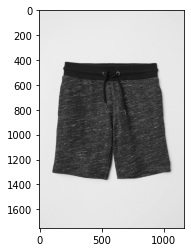

In [19]:
img_indices = [623245001]
img_url = f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(img_indices[0])[:2]}/0{int(img_indices[0])}.jpg'

import matplotlib.pyplot as plt
img = plt.imread(img_url)
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
print(imgGray[:,:,].shape)
plt.imshow(imgGray, cmap='gray') # 흑백으로 보고 싶을 땐, plt.imshow(a, cmap='gray')

In [20]:
from sklearn.decomposition import PCA
imgList = train_df['article_id'].tolist()
print(len(imgList))

105100


In [21]:
def returnUrl(name):
    img_url = f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(name)[:2]}/0{int(name)}.jpg'
    try:
        img = plt.imread(img_url)
        imgGray = 0
        if img.ndim>2:
            R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
            imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
        if img.ndim<3:
            plt.imshow(img, cmap='gray')
            print(img.ndim)
        if type(imgGray) is int:
            imgGray = np.array(imgGray)
        imgGray = imgGray.reshape(imgGray.size,1,1)
        return imgGray
    except Exception as e:    # 모든 예외의 에러 메시지를 출력할 때는 Exception을 사용
        print('예외가 발생했습니다.', e)
        img_url = f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(name)[:2]}'
        for dirname, _, filenames in os.walk(img_url):
            if not str(article_pd[i]) in str(article_pd[i]):
                print(i, end=' ')
        
#df = dfs['article_id'][:300].apply(lambda x:returnUrl(x))

In [22]:
flattenImg = returnUrl(108775015)
flattenImg = flattenImg[::300]
flattenImg = flattenImg[:5000]
if len(flattenImg)<6144:
    print(flattenImg.shape, end='')
    pad = [0] * (6144 - len(flattenImg))
    flattenImg = flattenImg.reshape(1, len(flattenImg))
    flattenImg =flattenImg[0].tolist()
    flattenImg = np.array(flattenImg + pad)
    flattenImg = flattenImg.reshape(len(flattenImg), 1)
    print(flattenImg.shape)

(5000, 1, 1)(6144, 1)


# Cate_dataset

In [23]:
import torch # 파이토치 패키지 임포트
from torch.utils.data import Dataset # Dataset 클래스 임포트
import h5py # h5py 패키지 임포트
import re # 정규식표현식 모듈 임포트 

class CateDataset(Dataset):
    """데이터셋에서 학습에 필요한 형태로 변환된 샘플 하나를 반환
    """
    def __init__(self, df_data, img_h5_path, token2id, tokens_max_len=64, type_vocab_size=30):
        print("CateDataset:",len(df_data))
        """        
        매개변수
        df_data: 상품타이틀, 카테고리 등의 정보를 가지는 데이터프레임
        img_h5_path: img_feat가 저장돼 있는 h5 파일의 경로
        token2id: token을 token_id로 변환하기 위한 맵핑 정보를 가진 딕셔너리
        tokens_max_len: tokens의 최대 길이. 상품명의 tokens가 이 이상이면 잘라서 버림
        type_vocab_size: 타입 사전의 크기
        """  
        self.tokens = df_data['tokens'].values # 전처리된 상품명
        self.img_indices = df_data['article_id'].values
        self.img_h5_path = img_h5_path 
        self.tokens_max_len = tokens_max_len        
        self.labels = df_data[['index_name','product_type_name','section_name']].values
        self.token2id = token2id 
        self.p = re.compile('▁[^▁]+') # ▁기호를 기준으로 나누기 위한 컴파일된 정규식
        self.type_vocab_size = type_vocab_size
  
        
    def __getitem__(self, idx):

        """
        데이터셋에서 idx에 대응되는 샘플을 변환하여 반환        
        """
        if idx >= len(self):
            raise StopIteration

        # idx에 해당하는 상품명 가져오기. 상품명은 문자열로 저장돼 있음
        tokens = self.tokens[idx]
        if not isinstance(tokens, str):
            tokens = ''

        # 상품명을 ▁기호를 기준으로 분리하여 파이썬 리스트로 저장
        # "▁직소퍼즐 ▁1000 조각 ▁바다 거북 의 ▁여행 ▁pl 12 75" =>
        # ["▁직소퍼즐", "▁1000 조각", "▁바다 거북 의", "▁여행", "▁pl 12 75"]
        tokens = self.p.findall(tokens)

        # ▁ 기호 별 토큰타입 인덱스 부여
        # ["▁직소퍼즐", "▁1000 조각", "▁바다 거북 의", "▁여행", "▁pl 12 75"] =>
        # [     0     ,     1    1  ,    2     2  2 ,     3   ,   4  4   4 ]
        token_types = [type_id for type_id, word in enumerate(tokens) for _ in word.split()]       
        tokens = " ".join(tokens) # ▁기호로 분리되기 전의 원래의 tokens으로 되돌림

        # 토큰을 토큰에 대응되는 인덱스로 변환
        # "▁직소퍼즐 ▁1000 조각 ▁바다 거북 의 ▁여행 ▁pl 12 75" =>
        # [2291, 784, 2179, 3540, 17334, 30827, 1114, 282, 163, 444]
        # "▁직소퍼즐" => 2291
        # "▁1000" => 784
        # "조각" => 2179
        # ...
        token_ids = [self.token2id[tok] if tok in self.token2id else 0 for tok in tokens.split()]

        # token_ids의 길이가 max_len보다 길면 잘라서 버림
        if len(token_ids) > self.tokens_max_len:
            token_ids = token_ids[:self.tokens_max_len]      
            token_types = token_types[:self.tokens_max_len]

        # token_ids의 길이가 max_len보다 짧으면 짧은만큼 PAD값 0 값으로 채워넣음
        # token_ids 중 값이 있는 곳은 1, 그 외는 0으로 채운 token_mask 생성
        token_mask = [1] * len(token_ids)
        token_pad = [0] * (self.tokens_max_len - len(token_ids))
        token_ids += token_pad
        token_mask += token_pad
        token_types += token_pad # max_len 보다 짧은만큼 PAD 추가

        # h5파일에서 이미지 인덱스에 해당하는 img_feat를 가져옴
        # 파이토치의 데이터로더에 의해 동시 h5파일에 동시접근이 발생해도
        # 안정적으로 img_feat를 가져오려면 아래처럼 매번 h5py.File 호출필요
        # with h5py.File(self.img_h5_path, 'r') as img_feats:
        # img_feat = img_feats['img_feat'][self.img_indices[idx]]

        #print(token_ids, token_mask, token_types, img_feat)
        import matplotlib.pyplot as plt

        img_url = f'../input/h-and-m-personalized-fashion-recommendations/images/0{str(self.img_indices[idx])[:2]}/0{int(self.img_indices[idx])}.jpg'
        flattenImg = returnUrl(self.img_indices[idx])
        flattenImg = flattenImg[::300]
        if len(flattenImg)<6144:
            pad = [0] * (6144 - len(flattenImg))
            flattenImg = flattenImg.reshape(1, len(flattenImg))
            flattenImg =flattenImg[0].tolist()
            flattenImg = np.array(flattenImg + pad)
            flattenImg = flattenImg.reshape(len(flattenImg), 1)
        if len(flattenImg)<6144:
            print(len(flattenImg))
        img_feat = flattenImg[:6144]
        img_feat = img_feat.reshape(-1,2048)   
    
        # 넘파이(numpy)나 파이썬 자료형을 파이토치의 자료형으로 변환
        token_ids = torch.LongTensor(token_ids)
        token_mask = torch.LongTensor(token_mask)
        token_types = torch.LongTensor(token_types)

        try:
            # token_types의 타입 인덱스의 숫자 크기가 type_vocab_size 보다 작도록 바꿈
            token_types[token_types >= self.type_vocab_size] = self.type_vocab_size-1 
            img_feat = torch.FloatTensor(img_feat)
        except Exception as e: 
            print(e)

        # 대/중/소/세 라벨 준비
        label = self.labels[idx]    
        try:
            label = torch.LongTensor(label)
        except Exception as e:
            print(e)
            
        # 크게 3가지 텍스트 입력, 이미지 입력, 라벨을 반환한다.
        return token_ids, token_mask, token_types, img_feat, label

    def __len__(self):
        """
        tokens의 개수를 반환한다. 즉, 상품명 문장의 개수를 반환한다.
        """
        return len(self.tokens)

# Train.py

In [24]:
import os
import time
import math
import torch
import random
import argparse
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import StratifiedKFold, KFold
from transformers import AdamW, get_linear_schedule_with_warmup

import warnings
warnings.filterwarnings(action='ignore')

# 전처리된 데이터가 저장된 디렉터리
DB_PATH=f'./'

# 토큰을 인덱스로 치환할 때 사용될 사전 파일이 저장된 디렉터리 
VOCAB_DIR=os.path.join(DB_PATH, 'vocab')

# 학습된 모델의 파라미터가 저장될 디렉터리
MODEL_PATH=f'./'

# 미리 정의된 설정 값
class CFG:
    learning_rate=3.0e-4 # 러닝 레이트
    batch_size=1024 # 배치 사이즈
    num_workers=4 # 워커의 개수
    print_freq=100 # 결과 출력 빈도
    start_epoch=0 # 시작 에폭
    num_train_epochs=8 # 학습할 에폭수
    warmup_steps=100 # lr을 서서히 증가시킬 step 수 100->50
    max_grad_norm=10 # 그래디언트 클리핑에 사용
    weight_decay=0.01
    dropout=0.2 # dropout 확률
    hidden_size=512 # 은닉 크기
    intermediate_size=256 # TRANSFORMER셀의 intermediate 크기
    nlayers=2 # BERT의 층수
    nheads=8 # BERT의 head 개수
    seq_len=32 # 토큰의 최대 길이
    n_b_cls = 10 + 1 # 대카테고리 개수
    n_m_cls = 131 + 1 # 중카테고리 개수
    n_s_cls = 56 + 1 # 소카테고리 개수
    vocab_size = 32000 # 토큰의 유니크 인덱스 개수
    img_feat_size = 2048 # 이미지 피처 벡터의 크기
    type_vocab_size = 30 # 타입의 유니크 인덱스 개수
    csv_path = os.path.join(DB_PATH, 'train.csv')
    h5_path = os.path.join(DB_PATH, 'train_img_feat.h5')
    seed = 42 

In [25]:
def calc_cate_acc(pred, label):
    """
    대/중/소/세 카테고리별 정확도와 전체(overall) 정확도를 반환
    전체 정확도는 대회 평가 방법과 동일한 가중치로 계산
    """
    b_pred, m_pred, s_pred= pred    
    _, b_idx = b_pred.max(1)
    _, m_idx = m_pred.max(1)
    _, s_idx = s_pred.max(1)
        
    b_acc = (b_idx == label[:, 0]).sum().item() / (label[:, 0]>0).sum().item()
    m_acc = (m_idx == label[:, 1]).sum().item() / (label[:, 1]>0).sum().item()
            
    s_acc = (s_idx == label[:, 2]).sum().item() / ((label[:, 2]>0).sum().item()+1e-06)  
    o_acc = (b_acc + 1.2*m_acc + 1.3*s_acc)/3
    return o_acc, b_acc, m_acc, s_acc


def save_checkpoint(state, model_path, model_filename, is_best=False):
    print('saving cust_model ...')
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    torch.save(state, os.path.join(model_path, model_filename))
    if is_best:
        torch.save(state, os.path.join(model_path, 'best_' + model_filename))


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))

In [26]:
def train(train_loader, model, optimizer, epoch, scheduler):
    print('len(train_loader)', len(train_loader))
    """    
    한 에폭 단위로 학습을 시킵니다.
    매개변수
    train_loader: 학습 데이터셋에서 배치(미니배치) 불러옵니다.
    model: 학습될 파라미터를 가진 딥러닝 모델
    optimizer: 파라미터를 업데이트 시키는 역할
    scheduler: learning_rate를 감소시키는 역할
    """
    print("Now Train!")
    # AverageMeter는 지금까지 입력 받은 전체 수의 평균 값 반환 용도
    batch_time = AverageMeter()     # 한 배치처리 시간 집계
    data_time = AverageMeter()      # 데이터 로딩 시간 집계
    losses = AverageMeter()         # 손실 값 집계
    o_accuracies = AverageMeter()   # 대회 평가 방법으로 집계
    b_accuracies = AverageMeter()   # 대카테고리 정확도 집계
    m_accuracies = AverageMeter()   # 중카테고리 정확도 집계
    s_accuracies = AverageMeter()   # 소카테고리 정확도 집계
    
    sent_count = AverageMeter()     # 문장 처리 개수 집계
    
    # 학습 모드로 교체
    model.train()
    
    start = end = time.time()
    
    # train_loader에서 반복해서 학습용 배치 데이터를 받아옵니다.
    # CateDataset의 __getitem__() 함수의 반환 값과 동일한 변수 반환
    for step, (token_ids, token_mask, token_types, img_feat, label) in enumerate(train_loader):

        # 데이터 로딩 시간 기록
        data_time.update(time.time() - end)

        # 배치 데이터의 위치를 CPU메모리에서 GPU메모리로 이동
#         token_ids, token_mask, token_types, img_feat, label = (
#             token_ids.cuda(), token_mask.cuda(), token_types.cuda(), 
#             img_feat.cuda(), label.cuda())
   
        batch_size = token_ids.size(0)   

        # model은 배치 데이터를 입력 받아서 예측 결과 및 loss 반환
        # model은 인스턴스이나 __call__함수가 추가돼 함수처럼 호출이 가능합니다. 
        # CateClassifier의 __call__ 함수 내에서 forward 함수가 호출됩니다. 
        
        loss, pred = model(token_ids, token_mask, token_types, img_feat, label)
        loss = loss.mean() # Multi-GPU 학습의 경우 mean() 호출 필요

        # loss 값을 기록
        losses.update(loss.item(), batch_size)

        # 역전파 수행
        loss.backward()

        # CFG.max_grad_norm 이상의 값을 가지는 그래디언트 값 클리핑
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)

        scheduler.step()    # 스케쥴러로 learning_rate 조절
        optimizer.step()    # 옵티마이저로 파라미터 업데이터
        optimizer.zero_grad() # 옵티마이저 내의 그래디언트 초기화

        # 소요시간 측정
        batch_time.update(time.time() - end)
        end = time.time()

        sent_count.update(batch_size)

            
        # CFG.print_freq 주기대로 결과 로그를 출력
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            # 대/중/소/세가 예측된 pred와 정답 label로 정확도 계산 및 집계
            o_acc, b_acc, m_acc, s_acc = calc_cate_acc(pred, label)
            o_accuracies.update(o_acc, batch_size)
            b_accuracies.update(b_acc, batch_size)
            m_accuracies.update(m_acc, batch_size)
            s_accuracies.update(s_acc, batch_size)
            
            print('Epoch: [{0}][{1}/{2}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.3f}({loss.avg:.3f}) '
                  'OAcc: {o_acc.val:.3f}({o_acc.avg:.3f}) '
                  'BAcc: {b_acc.val:.3f}({b_acc.avg:.3f}) '
                  'MAcc: {m_acc.val:.4f}({m_acc.avg:.3f}) '
                  'SAcc: {s_acc.val:.3f}({s_acc.avg:.3f}) '                  
                  'Grad: {grad_norm:.4f}  '
                  'LR: {lr:.6f}  '
                  'sent/s {sent_s:.0f} '
                  .format(
                   epoch, step+1, len(train_loader),
                   data_time=data_time, loss=losses,
                   o_acc=o_accuracies, b_acc=b_accuracies, m_acc=m_accuracies,
                   s_acc=s_accuracies, 
                   remain=timeSince(start, float(step+1)/len(train_loader)),
                   grad_norm=grad_norm,
                   lr=scheduler.get_lr()[0],                   
                   sent_s=sent_count.avg/batch_time.avg
                   ))
    # 학습 동안 집계된 결과 반환
    return (losses.avg, o_accuracies.avg, b_accuracies.avg, m_accuracies.avg, 
            s_accuracies.avg) 

In [27]:
def validate(valid_loader, model):
    """    
    한 에폭 단위로 검증합니다.
    매개변수
    valid_loader: 검증 데이터셋에서 배치(미니배치) 불러옵니다.
    model: train 함수에서 학습된 딥러닝 모델
    """    
    batch_time = AverageMeter()     # 한 배치처리 시간 집계
    data_time = AverageMeter()      # 데이터 로딩 시간 집계
    losses = AverageMeter()         # 손실 값 집계
    o_accuracies = AverageMeter()   # 대회 평가 방법으로 집계
    b_accuracies = AverageMeter()   # 대카테고리 정확도 집계
    m_accuracies = AverageMeter()   # 중카테고리 정확도 집계
    s_accuracies = AverageMeter()   # 소카테고리 정확도 집계
    
    sent_count = AverageMeter()     # 문장 처리 개수 집계
    
    # 평가(evaluation) 모드로 교체
    # 드롭아웃이나 배치정규화가 일관된 값을 내도록 함
    model.eval()

    start = end = time.time()
    try:    
        for step, (token_ids, token_mask, token_types, img_feat, label) in enumerate(valid_loader):
            # 데이터 로딩 시간 기록
            data_time.update(time.time() - end)

            # 배치 데이터의 위치를 CPU메모리에서 GPU메모리로 이동
#             token_ids, token_mask, token_types, img_feat, label = (
#                 token_ids.cuda(), token_mask.cuda(), token_types.cuda(), 
#                 img_feat.cuda(), label.cuda())

            batch_size = token_ids.size(0)

            # with문 내에서는 그래디언트 계산을 하지 않도록 함
            with torch.no_grad():
                # model은 배치 데이터를 입력 받아서 예측 결과 및 loss 반환
                loss, pred = model(token_ids, token_mask, token_types, img_feat, label)
                loss = loss.mean()

            # loss 값을 기록
            losses.update(loss.item(), batch_size)

            # 소요시간 측정
            batch_time.update(time.time() - end)
            end = time.time()

            sent_count.update(batch_size)

            # CFG.print_freq 주기대로 결과 로그를 출력
            if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
                o_acc, b_acc, m_acc, s_acc = calc_cate_acc(pred, label)
                o_accuracies.update(o_acc, batch_size)
                b_accuracies.update(b_acc, batch_size)
                m_accuracies.update(m_acc, batch_size)
                s_accuracies.update(s_acc, batch_size)

                print('TEST: {0}/{1}] '
                      'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                      'Elapsed {remain:s} '
                      'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                      'OAcc: {o_acc.val:.3f}({o_acc.avg:.3f}) '
                      'BAcc: {b_acc.val:.3f}({b_acc.avg:.3f}) '
                      'MAcc: {m_acc.val:.4f}({m_acc.avg:.3f}) '
                      'SAcc: {s_acc.val:.3f}({s_acc.avg:.3f}) '
                      'sent/s {sent_s:.0f} '
                      .format(
                       step+1, len(valid_loader),
                       data_time=data_time, loss=losses,
                       o_acc=o_accuracies, b_acc=b_accuracies, m_acc=m_accuracies,
                       s_acc=s_accuracies,
                       remain=timeSince(start, float(step+1)/len(valid_loader)),
                       sent_s=sent_count.avg/batch_time.avg
                       ))
        # 검증 동안 집계된 결과 반환
        return (losses.avg, o_accuracies.avg, b_accuracies.avg, m_accuracies.avg, 
                s_accuracies.avg)
    except Exception as e:
        print("val=>",e)

In [28]:
def train_main(FOLD):
    
    # 랜덤 시드를 설정하여 매 코드를 실행할 때마다 동일한 결과를 얻게 합니다.
    os.environ['PYTHONHASHSEED'] = str(CFG.seed)
    random.seed(CFG.seed)
    np.random.seed(CFG.seed)
    torch.manual_seed(CFG.seed)    
    torch.cuda.manual_seed(CFG.seed)
    torch.backends.cudnn.deterministic = True
    
    # 전처리된 데이터를 읽어옵니다.
    print('loading ...')
    train_df = pd.read_csv(CFG.csv_path, dtype={'tokens':str})    
    train_df['img_idx'] = train_df.index # 몇 번째 행인지 img_idx 칼럼에 기록
   
    # KFold을 사용해 데이터셋을 학습셋(train_df)과 검증셋(valid_df)으로 나눕니다.
    folds = KFold(n_splits=5, random_state=CFG.seed, shuffle=True)
    train_idx, valid_idx = list(folds.split(train_df.values))[FOLD]
    
    valid_df = train_df.iloc[valid_idx]
    train_df = train_df.iloc[train_idx]
    
    # 토큰을 대응되는 인덱스로 치환할 때 사용될 딕셔너리를 로딩합니다.
    vocab = [line.split('\t')[0] for line in open(os.path.join(DB_PATH, 'spm.vocab'), encoding='utf-8').readlines()]
    token2id = dict([(w, i) for i, w in enumerate(vocab)])
    print('loading ... done')
    
    # 학습에 적합한 형태의 샘플을 가져오는 CateDataset의 인스턴스를 만듭니다.
    train_db = CateDataset(train_df, CFG.h5_path, token2id, 
                                       CFG.seq_len, CFG.type_vocab_size)
    valid_db = CateDataset(valid_df, CFG.h5_path, token2id, 
                                       CFG.seq_len, CFG.type_vocab_size)
     
    # 여러 개의 워커로 빠르게 배치(미니배치)를 생성하도록 DataLoader로 
    # CateDataset 인스턴스를 감싸 줍니다.    
    train_loader = DataLoader(
        train_db, batch_size=CFG.batch_size, shuffle=True, drop_last=True,
        num_workers=CFG.num_workers, pin_memory=True)
    
    valid_loader = DataLoader(
        valid_db, batch_size=CFG.batch_size, shuffle=False,
        num_workers=CFG.num_workers, pin_memory=False)
    
    # 카테고리 분류기 모델을 생성합니다.
    model = CateClassifier(CFG)
    
    # 모델의 파라미터를 GPU메모리로 옮깁니다.
#     model.cuda()    
    
    # 모델의 파라미터 수를 출력합니다.
    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)
    print('parameters: ', count_parameters(model))
    
#     n_gpu = torch.cuda.device_count()
#     print('n_gpu:',n_gpu)

    # 학습 동안 수행될 총 스텝 수
    # 데이터셋을 배치크기로 나눈 것이 1에폭 동안 스텝 수
    # 총 스텝 수 = 1에폭 스텝 수 * 총 에폭 수
    num_train_optimization_steps = int(
        len(train_db) / CFG.batch_size) * (CFG.num_train_epochs)
    print('num_train_optimization_steps', num_train_optimization_steps)    

    # 파라미터 그룹핑 정보 생성
    # 가중치 감쇠(weight decay) 미적용 파라미터 그룹과 적용 파라미터로 나눔
    param_optimizer = list(model.named_parameters())    
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params':[p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 
         'weight_decay': 0.0}
    ]
    
    # AdamW 옵티마이저 생성
    optimizer = AdamW(optimizer_grouped_parameters,
                           lr=CFG.learning_rate,
                           weight_decay=CFG.weight_decay,                           
                           )

    # learning_rate가 선형적으로 감소하는 스케줄러 생성
    scheduler = get_linear_schedule_with_warmup(optimizer, 
                                                num_warmup_steps=CFG.warmup_steps,
                                                num_training_steps=num_train_optimization_steps)
    print('use WarmupLinearSchedule ...')
    
    def get_lr():    
        return scheduler.get_lr()[0]
    
    log_df = pd.DataFrame() # 에폭 별 실험결과 로그를 저장할 데이터 프레임
    curr_lr = get_lr()    
    print(f'initial learning rate:{curr_lr}')
    
    # (num_train_epochs - start_epoch) 횟수 만큼 학습을 진행합니다.
    for epoch in range(CFG.start_epoch, CFG.num_train_epochs):
        
        # 한 에폭의 결과가 집계된 한 행을 반환합니다.
        def get_log_row_df(epoch, lr, train_res, valid_res):
            log_row = ''
            print(epoch, lr, train_res, valid_res)
            try:
                log_row = {'EPOCH':epoch, 'LR':lr,
                           'TRAIN_LOSS':train_res[0], 'TRAIN_OACC':train_res[1],
                           'TRAIN_BACC':train_res[2], 'TRAIN_MACC':train_res[3],
                           'TRAIN_SACC':train_res[4],
                           'VALID_LOSS':valid_res[0], 'VALID_OACC':valid_res[1],
                           'VALID_BACC':valid_res[2], 'VALID_MACC':valid_res[3],
                           'VALID_SACC':valid_res[4],
                           }
            except Exception as e:
                print('get_log_row_df=>e',e)
            return pd.DataFrame(list(log_row))             
        
        
        # 학습을 진행하고 loss나 accuracy와 같은 결과를 반환합니다.
        train_res = train(train_loader, model, optimizer, epoch, scheduler)
 
        # 검증을 진행하고 loss나 accuracy와 같은 결과를 반환합니다.
        valid_res = validate(valid_loader, model)
        curr_lr = get_lr()
        print(f'set the learning_rate: {curr_lr}')
        
        log_row_df = get_log_row_df(epoch, curr_lr, train_res, valid_res)
        # log_df에 결과가 집계된 한 행을 추가합니다.
        log_df = log_df.append(log_row_df, sort=False)
        print(log_df.tail(10)) # log_df의 최신 10개 행만 출력합니다.
        
        # 모델의 파라미터가 저장될 파일의 이름을 정합니다.
        curr_model_name = (f'b{CFG.batch_size}_h{CFG.hidden_size}_'
                            f'd{CFG.dropout}_l{CFG.nlayers}_hd{CFG.nheads}_'
                            f'ep{epoch}_s{CFG.seed}_fold.pt')
        # torch.nn.DataParallel로 감싸진 경우 원래의 model을 가져옵니다.
        model_to_save = model.module if hasattr(model, 'module') else model  
        
    print('training done')

    # 모델의 파라미터를 저장합니다.
    save_checkpoint({
        'epoch': epoch + 1,
        'arch': 'transformer',
        'state_dict': model_to_save.state_dict(),
        'log': log_df,
        },
        MODEL_PATH, curr_model_name,
    )

In [29]:
train_main(0)

loading ...
loading ... done
CateDataset: 84080
CateDataset: 21020
parameters:  22039752
num_train_optimization_steps 656
use WarmupLinearSchedule ...
initial learning rate:0.0
len(train_loader) 82
Now Train!
Epoch: [0][1/82] Data 96.680 (96.680) Elapsed 1m 55s (remain 155m 16s) Loss: 4.598(4.598) OAcc: 0.058(0.058) BAcc: 0.123(0.123) MAcc: 0.0242(0.024) SAcc: 0.017(0.017) Grad: 4.9970  LR: 0.000003  sent/s 9 
Epoch: [0][82/82] Data 0.009 (15.640) Elapsed 42m 24s (remain 0m 0s) Loss: 3.606(3.865) OAcc: 0.220(0.139) BAcc: 0.343(0.233) MAcc: 0.1809(0.103) SAcc: 0.077(0.047) Grad: 1.0935  LR: 0.000246  sent/s 33 
TEST: 1/21] Data 103.178 (103.178) Elapsed 1m 48s (remain 36m 7s) Loss: 3.8227(3.8227) OAcc: 0.137(0.137) BAcc: 0.138(0.138) MAcc: 0.1610(0.161) SAcc: 0.062(0.062) sent/s 9 
2
TEST: 21/21] Data 24.921 (21.768) Elapsed 9m 15s (remain 0m 0s) Loss: 3.4419(3.5583) OAcc: 0.369(0.217) BAcc: 0.726(0.341) MAcc: 0.2087(0.177) SAcc: 0.099(0.075) sent/s 38 
set the learning_rate: 0.00024599

# Inference

In [30]:
import os
os.environ['OMP_NUM_THREADS'] = '24'
os.environ['NUMEXPR_MAX_THREADS'] = '24'
import math
import glob
import json
import torch
import time
import random
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings(action='ignore')
import argparse

# 전처리된 데이터가 저장된 디렉터리
DB_DIR = '../input/h-and-m-personalized-fashion-recommendations'

# 토큰을 인덱스로 치환할 때 사용될 사전 파일이 저장된 디렉터리 
VOCAB_DIR = os.path.join('./', 'vocab')

# 학습된 모델의 파라미터가 저장될 디렉터리
MODEL_DIR = './'

# 제출할 예측결과가 저장될 디렉터리
SUBMISSION_DIR = './'


# 미리 정의된 설정 값
class CFG:    
    batch_size=1024 # 배치 사이즈
    num_workers=1 # 워커의 개수
    print_freq=100 # 결과 출력 빈도    
    warmup_steps=100 # lr을 서서히 증가시킬 step 수        
    hidden_size=512 # 은닉 크기
    dropout=0.2 # dropout 확률
    intermediate_size=256 # TRANSFORMER셀의 intermediate 크기
    nlayers=2 # BERT의 층수
    nheads=8 # BERT의 head 개수
    seq_len=32 # 토큰의 최대 길이
    n_b_cls = 10 + 1 # 대카테고리 개수
    n_m_cls = 131 + 1 # 중카테고리 개수
    n_s_cls = 56 + 1 # 소카테고리 개수
    vocab_size = 32000 # 토큰의 유니크 인덱스 개수
    img_feat_size = 2048 # 이미지 피처 벡터의 크기
    type_vocab_size = 30 # 타입의 유니크 인덱스 개수
    csv_path = os.path.join('./', 'train.csv')# 아직 dev데이터셋없음
    h5_path = os.path.join('./', 'train_img_feat.h5')

In [31]:
def inference_main():
  
    CFG.seed =  41     

    # 랜덤 시드를 설정하여 매 코드를 실행할 때마다 동일한 결과를 얻게 함
    os.environ['PYTHONHASHSEED'] = str(CFG.seed)
    random.seed(CFG.seed)
    np.random.seed(CFG.seed)
    torch.manual_seed(CFG.seed)    
    torch.cuda.manual_seed(CFG.seed)
    torch.backends.cudnn.deterministic = True
    
    # 전처리된 데이터를 읽어옵니다.
    print('loading ...')
    dev_df = pd.read_csv(CFG.csv_path, dtype={'tokens':str})     
    dev_df['img_idx'] = dev_df.index
    img_h5_path = CFG.h5_path
    
    vocab = [line.split('\t')[0] for line in open(os.path.join('./', 'spm.vocab'), encoding='utf-8').readlines()]
    token2id = dict([(w, i) for i, w in enumerate(vocab)])    
    print('loading ... done')
        
    # 찾아진 모델 파일의 개수만큼 모델을 만들어서 파이썬 리스트에 추가함
    model_list = []
    # args.model_dir에 있는 확장자 .pt를 가지는 모든 모델 파일의 경로를 읽음
    model_path_list = glob.glob(os.path.join('./', '*.pt'))
    # 모델 경로 개수만큼 모델을 생성하여 파이썬 리스트에 추가함
    for model_path in model_path_list:
        model = CateClassifier(CFG)
        if model_path != "":
            print("=> loading checkpoint '{}'".format(model_path))
            checkpoint = torch.load(model_path)        
            state_dict = checkpoint['state_dict']                
            model.load_state_dict(state_dict, strict=True)  
            print("=> loaded checkpoint '{}' (epoch {})"
                  .format(model_path, checkpoint['epoch']))
#         model.cuda()
#         n_gpu = torch.cuda.device_count()
#         if n_gpu > 1:
#             model = torch.nn.DataParallel(model)
        model_list.append(model)
    if len(model_list) == 0:
        print('Please check the model directory.')
        return
    
    # 모델의 파라미터 수를 출력합니다.
    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)
    print('parameters: ', count_parameters(model_list[0]))    
    
    # 모델의 입력에 적합한 형태의 샘플을 가져오는 CateDataset의 인스턴스를 만듦
    dev_db = CateDataset(dev_df, img_h5_path, token2id, CFG.seq_len, 
                                       CFG.type_vocab_size)
    
    # 여러 개의 워커로 빠르게 배치(미니배치)를 생성하도록 DataLoader로 
    # CateDataset 인스턴스를 감싸 줌
    dev_loader = DataLoader(
        dev_db, batch_size=CFG.batch_size, shuffle=False,
        num_workers=CFG.num_workers, pin_memory=True)    
    
    # dev 데이터셋의 모든 상품명에 대해 예측된 카테고리 인덱스를 반환
    pred_idx = inference(dev_loader, model_list)

    # dev 데이터셋의 상품ID별 예측된 카테고리를 붙여서 제출 파일을 생성하여 저장
    cate_cols = ['index_name', 'product_type_name', 'section_name'] 
    dev_df[cate_cols] = pred_idx
    os.makedirs(SUBMISSION_DIR, exist_ok=True)
    submission_path = os.path.join(SUBMISSION_DIR, 'dev.csv')
    dev_df[['article_id', 'index_name', 'product_type_name', 'section_name', 'detail_desc']].to_csv(submission_path)
    
    print('done')


def inference(dev_loader, model_list):
    """
    dev 데이터셋의 모든 상품명에 대해 여러 모델들의 예측한 결과를 앙상블 하여 정확도가 개선된
    카테고리 인덱스를 반환
    
    매개변수
    dev_loader: dev 데이터셋에서 배치(미니배치) 불러옴
    model_list: args.model_dir에서 불러온 모델 리스트 
    """
    batch_time = AverageMeter()
    data_time = AverageMeter()    
    sent_count = AverageMeter()
    
    # 모딜 리스트의 모든 모델을 평가(evaluation) 모드로 작동하게 함
    for model in model_list:
        model.eval()

    start = end = time.time()
    
    # 배치별 예측한 대/중/소/세 카테고리의 인덱스를 리스트로 가짐
    pred_idx_list = []
    
    # dev_loader에서 반복해서 배치 데이터를 받음
    # CateDataset의 __getitem__() 함수의 반환 값과 동일한 변수 반환
    for step, (token_ids, token_mask, token_types, img_feat, _) in enumerate(dev_loader):
        # 데이터 로딩 시간 기록
        data_time.update(time.time() - end)
        
        # 배치 데이터의 위치를 CPU메모리에서 GPU메모리로 이동
#         token_ids, token_mask, token_types, img_feat = (
#             token_ids.cuda(), token_mask.cuda(), token_types.cuda(), img_feat.cuda())
        
        batch_size = token_ids.size(0)
        
        # with문 내에서는 그래디언트 계산을 하지 않도록 함
        with torch.no_grad():
            pred_list = []
            # model 별 예측치를 pred_list에 추가합니다.
            for model in model_list:
                _, pred = model(token_ids, token_mask, token_types, img_feat)
                pred_list.append(pred)
            
            # 예측치 리스트를 앙상블 하여 하나의 예측치로 만듦
            pred = ensemble(pred_list)
            # 예측치에서 카테고리별 인덱스를 가져옴
            pred_idx = get_pred_idx(pred)
            # 현재 배치(미니배치)에서 얻어진 카테고리별 인덱스를 pred_idx_list에 추가
            pred_idx_list.append(pred_idx.cpu())
            
        # 소요시간 측정
        batch_time.update(time.time() - end)
        end = time.time()

        sent_count.update(batch_size)

        if step % CFG.print_freq == 0 or step == (len(dev_loader)-1):
            print('TEST: {0}/{1}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '                  
                  'sent/s {sent_s:.0f} '
                  .format(
                   step+1, len(dev_loader), batch_time=batch_time,                   
                   data_time=data_time,
                   remain=timeSince(start, float(step+1)/len(dev_loader)),
                   sent_s=sent_count.avg/batch_time.avg
                   ))
    
    # 배치별로 얻어진 카테고리 인덱스 리스트를 직렬연결하여 하나의 카테고리 인덱스로 변환
    pred_idx = torch.cat(pred_idx_list).numpy()
    return pred_idx

# 예측치의 각 카테고리 별로 가장 큰 값을 가지는 인덱스를 반환함
def get_pred_idx(pred):
    b_pred, m_pred, s_pred= pred # 대/중/소/세 예측치로 분리
    _, b_idx = b_pred.max(1) # 대카테고리 중 가장 큰 값을 가지는 인덱스를 변수에 할당
    _, m_idx = m_pred.max(1) # 중카테고리 중 가장 큰 값을 가지는 인덱스를 변수에 할당
    _, s_idx = s_pred.max(1) # 소카테고리 중 가장 큰 값을 가지는 인덱스를 변수에 할당
    
    # 대/중/소/세 인덱스 반환
    pred_idx = torch.stack([b_idx, m_idx, s_idx], 1)    
    return pred_idx


# 예측된 대/중/소/세 결과들을 앙상블함
# 앙상블 방법으로 간단히 산술 평균을 사용
def ensemble(pred_list):
    b_pred, m_pred, s_pred= 0, 0, 0  
    for pred in pred_list:
        # softmax를 적용해 대/중/소/세 각 카테고리별 모든 클래스의 합이 1이 되도록 정규화
        # 참고로 정규화된 pred[0]은 대카테고리의 클래스별 확률값을 가지는 확률분포 함수라 볼 수 있음
        b_pred += torch.softmax(pred[0], 1)
        m_pred += torch.softmax(pred[1], 1)
        s_pred += torch.softmax(pred[2], 1)
    b_pred /= len(pred_list)    # 모델별 '대카테고리의 정규화된 예측값'들의 평균 계산
    m_pred /= len(pred_list)   # 모델별 '중카테고리의 정규화된 예측값'들의 평균 계산
    s_pred /= len(pred_list)    # 모델별 '소카테고리의 정규화된 예측값'들의 평균 계산 
    
    # 앙상블 결과 반환 
    pred = [b_pred, m_pred, s_pred]    
    return pred


class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))

In [32]:
inference_main()

loading ...
loading ... done
=> loading checkpoint './b1024_h512_d0.2_l2_hd8_ep7_s42_fold.pt'
=> loaded checkpoint './b1024_h512_d0.2_l2_hd8_ep7_s42_fold.pt' (epoch 8)
parameters:  22039752
CateDataset: 105100
TEST: 1/103] Data 68.951 (68.951) Elapsed 1m 12s (remain 123m 58s) sent/s 14 
2
TEST: 101/103] Data 63.945 (66.891) Elapsed 119m 42s (remain 2m 22s) sent/s 14 
TEST: 103/103] Data 38.224 (66.587) Elapsed 121m 30s (remain 0m 0s) sent/s 14 
done


# SHOW

In [33]:
dev_result ='./dev.csv'
devresult = pd.read_csv(dev_result, sep=',')
devresult

,Unnamed: 0,article_id,index_name,product_type_name,section_name,detail_desc
0,0,108775015,0,0,21,Jersey top with narrow shoulder straps.
1,1,108775044,7,0,9,Jersey top with narrow shoulder straps.
2,2,108775051,7,0,9,Jersey top with narrow shoulder straps.
3,3,110065001,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,4,110065002,1,1,1,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
...,...,...,...,...,...,...
105095,105095,953450001,8,3,16,Socks in a fine-knit cotton blend with a small motif at the top and elasticated tops.
105096,105096,953763001,5,0,41,Loose-fitting sports vest top in ribbed fast-drying functional fabric made from recycled polyester with a racer back and rounded hem.
105097,105097,956217002,0,25,21,"Short, A-line dress in jersey with a round neckline and V-shaped opening at the front with narrow ties. Long, voluminous raglan sleeves and wide cuffs with covered buttons."
105098,105098,957375001,4,36,6,Large plastic hair claw.


In [34]:
idx_to_article_1 = {v:k for k,v in article_to_idx_1.items()}
j = [idx_to_article_1[i] for i in devresult['index_name']]
devresult['index_name'] = j

idx_to_article_2 = {v:k for k,v in article_to_idx_2.items()}
j2 = [idx_to_article_2[i] for i in devresult['product_type_name']]
devresult['product_type_name'] = j2

idx_to_article_3 = {v:k for k,v in article_to_idx_3.items()}
j3 = [idx_to_article_3[i] for i in devresult['section_name']]
devresult['section_name'] = j3

devresult.to_csv('SHOW.csv')
devresult

,Unnamed: 0,article_id,index_name,product_type_name,section_name,detail_desc
0,0,108775015,Ladieswear,Vest top,Womens Everyday Collection,Jersey top with narrow shoulder straps.
1,1,108775044,Divided,Vest top,Divided Basics,Jersey top with narrow shoulder straps.
2,2,108775051,Divided,Vest top,Divided Basics,Jersey top with narrow shoulder straps.
3,3,110065001,Lingeries/Tights,Bra,Womens Lingerie,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
4,4,110065002,Lingeries/Tights,Bra,Womens Lingerie,"Microfibre T-shirt bra with underwired, moulded, lightly padded cups that shape the bust and provide good support. Narrow adjustable shoulder straps and a narrow hook-and-eye fastening at the back. Without visible seams for greater comfort."
...,...,...,...,...,...,...
105095,105095,953450001,Children Sizes 134-170,Socks,Boys Underwear & Basics,Socks in a fine-knit cotton blend with a small motif at the top and elasticated tops.
105096,105096,953763001,Sport,Vest top,Ladies H&M Sport,Loose-fitting sports vest top in ribbed fast-drying functional fabric made from recycled polyester with a racer back and rounded hem.
105097,105097,956217002,Ladieswear,Dress,Womens Everyday Collection,"Short, A-line dress in jersey with a round neckline and V-shaped opening at the front with narrow ties. Long, voluminous raglan sleeves and wide cuffs with covered buttons."
105098,105098,957375001,Ladies Accessories,Earring,Womens Small accessories,Large plastic hair claw.
